<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/ViviendaBasicoMio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:

# gestión de datos
import numpy as np
import pandas as pd

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler

# modelos
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
# quitar alertas
import warnings
warnings.filterwarnings("ignore")

In [4]:

#Conexion
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#leemos el fichero IMDB
Viviendas=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejercicios/1.viviendas_basico.csv")
# Cargar archivo CSV como DataFrame ver los 5 primero registros
Viviendas.head(20)

Mounted at /content/drive


id_vivienda  superficie  num_hab  distancia fecha_const parking  precio  \
0        viv_1        65.0        1          7  1991-01-01     ext  166000   
1        viv_2        97.0        4          8  1994-01-01     ext  279000   
2        viv_3        80.0        4          4  1970-01-01     sin  233000   
3        viv_4        73.0        1          1  1983-01-01     ext  182000   
4        viv_5        86.0        2          8  1999-01-01     sin  210000   
5        viv_6        95.0        3          1  1978-01-01     int  297000   
6        viv_7       110.0        4          1  1978-01-01     ext  225000   
7        viv_8       126.0        1          1  1997-01-01     ext  222000   
8        viv_9        98.0        2          8  2002-01-01     sin  225000   
9       viv_10        65.0        4          5  1976-01-01     sin  207000   
10      viv_11        75.0        4         10  2000-01-01     sin  175000   
11      viv_12       124.0        4         10  1997-01-01     sin  219000   
12      viv_13       114.0        1          8  2021-01-01     int  217000   
13      viv_14       100.0        1         10  1989-01-01     sin  156000   
14      viv_15        82.0        3          5  1965-01-01     ext  166000   
15      viv_16        95.0        3          5  1970-01-01     ext  269000   
16      viv_17        81.0        1          8  1979-01-01     int  182000   
17      viv_18       125.0        3          3  1981-01-01     sin  294000   
18      viv_19       101.0        1          4  2010-01-01     sin  197000   
19      viv_20       120.0        2          2  1981-01-01     ext  294000   

    vendida  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  
5       1.0  
6       0.0  
7       0.0  
8       1.0  
9       1.0  
10      1.0  
11      1.0  
12      1.0  
13      1.0  
14      0.0  
15      1.0  
16      1.0  
17      1.0  
18      1.0  
19      1.0

o	Se obtiene información básica sobre las columnas del DataFrame (tipos de datos, valores no nulos, etc.).

df.describe(): Proporciona estadísticas descriptivas de las columnas numéricas.

df.head(n): Muestra las primeras n filas del DataFrame.

df.tail(n): Muestra las últimas n filas del DataFrame.

df.isnull().sum(): Muestra el número de valores nulos por columna.

df.dtypes: Muestra los tipos de datos de cada columna.

In [17]:
Viviendas.describe()
#Proporciona estadísticas descriptivas de las columnas numéricas

superficie      num_hab    distancia         precio      vendida
count  6990.000000  7000.000000  7000.000000    7000.000000  7000.000000
mean     96.266667     2.579286     5.436429  241017.571429     0.714286
std      20.264113     1.088458     2.816625   55666.450004     0.451786
min      60.000000     1.000000     1.000000  110000.000000     0.000000
25%      79.000000     2.000000     3.000000  201000.000000     0.000000
50%      97.000000     3.000000     5.000000  240000.000000     1.000000
75%     114.000000     4.000000     8.000000  284000.000000     1.000000
max     130.000000     4.000000    10.000000  350000.000000     1.000000

In [19]:
Viviendas.tail()
#Muestra las últimas n filas del DataFrame

id_vivienda  superficie  num_hab  distancia fecha_const parking  precio  \
6995    viv_6996        98.0        2          2  2006-01-01     int  342000   
6996    viv_6997       111.0        4          2  1981-01-01     ext  121000   
6997    viv_6998        76.0        3          4  2009-01-01     ext  250000   
6998    viv_6999       128.0        3          5  1979-01-01     sin  317000   
6999    viv_7000        77.0        4          7  1996-01-01     ext  177000   

      vendida  
6995      0.0  
6996      0.0  
6997      0.0  
6998      0.0  
6999      0.0

In [18]:
Viviendas.head(5)
#Muestra las primeras n filas del DataFrame

id_vivienda  superficie  num_hab  distancia fecha_const parking  precio  \
0       viv_1        65.0        1          7  1991-01-01     ext  166000   
1       viv_2        97.0        4          8  1994-01-01     ext  279000   
2       viv_3        80.0        4          4  1970-01-01     sin  233000   
3       viv_4        73.0        1          1  1983-01-01     ext  182000   
4       viv_5        86.0        2          8  1999-01-01     sin  210000   

   vendida  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0

In [5]:
Viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_vivienda  7000 non-null   object 
 1   superficie   6990 non-null   float64
 2   num_hab      7000 non-null   int64  
 3   distancia    7000 non-null   int64  
 4   fecha_const  7000 non-null   object 
 5   parking      7000 non-null   object 
 6   precio       7000 non-null   int64  
 7   vendida      7000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 437.6+ KB


In [6]:
Viviendas.isnull().sum()

id_vivienda     0
superficie     10
num_hab         0
distancia       0
fecha_const     0
parking         0
precio          0
vendida         0
dtype: int64

In [7]:
Viviendas.dtypes

id_vivienda     object
superficie     float64
num_hab          int64
distancia        int64
fecha_const     object
parking         object
precio           int64
vendida        float64
dtype: object

# **Comprensión del Problema de Negocio:**

Se plantea el problema: el cliente quiere saber qué viviendas de las que no se han vendido, tienen más probabilidad de ser vendidas

**Predicción**: Predecir qué viviendas no vendidas tienen más probabilidades de ser vendidas.

**Priorización**: Ayudar a la inmobiliaria a priorizar sus esfuerzos de venta en las propiedades más prometedoras.

**Toma de Decisiones**: Facilitar la toma de decisiones informadas basadas en datos, en lugar de intuiciones.

**Eficiencia**: Optimizar los recursos y reducir el riesgo al enfocar la venta en las propiedades con mayor probabilidad de éxito.



Se comprende que es necesario entrenar un modelo de clasificación que aprenda a
distinguir las viviendas que se venden de las que no se venden

In [8]:
ViviendasCopia = Viviendas.copy()

In [9]:
#id_vivienda: Eliminar.
del ViviendasCopia['id_vivienda']
#parking: One-hot encoding.
ViviendasCopia = pd.get_dummies(ViviendasCopia, columns=['parking'])

#fecha_const: Extraer el año.
# Primero, convertir la columna a tipo fecha
ViviendasCopia['fecha_const'] = pd.to_datetime(ViviendasCopia['fecha_const'])
# Luego, extraer el año
ViviendasCopia['año'] = ViviendasCopia['fecha_const'].dt.year

In [10]:
media_superficie = ViviendasCopia['superficie'].mean()
print(media_superficie)
#Completar la edad con 29 años, los valores nan
ViviendasCopia['superficie'] = ViviendasCopia['superficie'].fillna(96)

96.26666666666667


Elimina la columna fecha_const.

In [11]:
del ViviendasCopia['fecha_const']

Define tus variables X e y.

In [12]:
ViviendasCopia.head(5)

superficie  num_hab  distancia  precio  vendida  parking_ext  parking_int  \
0        65.0        1          7  166000      1.0         True        False   
1        97.0        4          8  279000      1.0         True        False   
2        80.0        4          4  233000      1.0        False        False   
3        73.0        1          1  182000      1.0         True        False   
4        86.0        2          8  210000      1.0        False        False   

   parking_sin   año  
0        False  1991  
1        False  1994  
2         True  1970  
3        False  1983  
4         True  1999

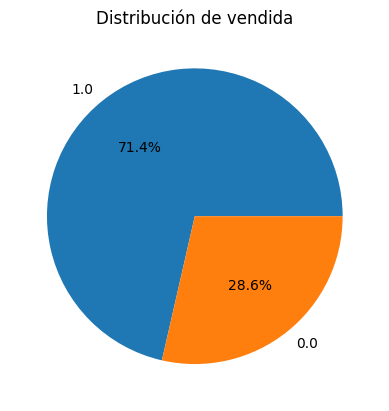

In [13]:
target = 'vendida'

# Calcula la frecuencia de cada valor de la variable target
counts = ViviendasCopia[target].value_counts()

# Crea el gráfico de pastel
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')

# Añade título al gráfico
plt.title(f'Distribución de {target}')

# Muestra el gráfico
plt.show()

Escala las features.

Selecciona el algoritmo y entrena el modelo

Seleccionar el Algoritmo de Clasificación:

Existen varios algoritmos de clasificación que puedes utilizar. Algunos ejemplos son:

Regresión Logística

Árboles de Decisión

Random Forest

Gradient Boosting Machines (como XGBoost, LightGBM)

Support Vector Machines

Redes Neuronales

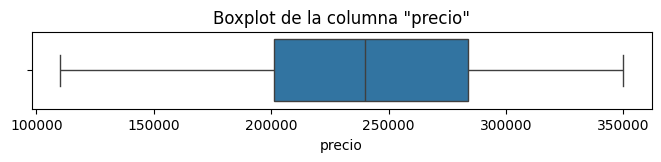

In [14]:
# Visualización de outliers en la columna 'precio'
fig, ax = plt.subplots(figsize=(8, 1))
sns.boxplot(data=ViviendasCopia, x='precio')
plt.title('Boxplot de la columna "precio"')
plt.show()

In [42]:
# Definimos la variable objetivo (target)
target = 'vendida'

# Agrupamos las columnas que creemos más importantes para nuestro análisis
features = ['precio', 'num_hab', 'superficie','distancia','parking_ext','parking_int','parking_sin','año']  # Añade o quita columnas según tu análisis

# Creamos la variable y (target)
y = ViviendasCopia[target]

# Creamos la variable X (features)
X = ViviendasCopia[features]

# Inicializamos el StandardScaler para estandarizar las variables
scaler = StandardScaler()

# Estandarizamos las variables X y almacenamos el resultado en X_scaled
X_scaled = scaler.fit_transform(X)

# Guardamos los indices para usarlo en el dataframe de predicciones
ids_viviendas = X.index

# Dividimos los datos en entrenamiento y prueba, guardamos los indices en X_test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  # 80% para entrenamiento, 20% para prueba

#Balanceo de clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

# **Predicción:**

El modelo entrenado se utiliza para predecir si las viviendas del dataset se venderán o no.df_predecir

Los resultados de la predicción (0 o 1) se almacenan en una nueva estructura.

In [44]:
# --- Paso 11: Predicción ---
# 1. Realizar la predicción sobre el conjunto de prueba (X_test)
predicciones = modelo.predict(X_test)

# 2. Almacenar los resultados en un DataFrame
df_predicciones = pd.DataFrame()
#Convertimos a dataframe para que tenga indices
X_test_df=pd.DataFrame(X_test)
#Creamos la columna de id
df_predicciones['id_vivienda'] = ids_viviendas[X_test_df.index] #Se usa el indice guardado
#Añadimos la columna de predicciones
df_predicciones['se_vendera'] = predicciones
# Mostrar el DataFrame con las predicciones
print(df_predicciones)

      id_vivienda  se_vendera
0               0         1.0
1               1         1.0
2               2         1.0
3               3         1.0
4               4         1.0
...           ...         ...
1395         1395         0.0
1396         1396         1.0
1397         1397         0.0
1398         1398         1.0
1399         1399         1.0

[1400 rows x 2 columns]


# **12.Presentación de Resultados:**

Se crea un nuevo DataFrame con los identificadores de las viviendas a predecir y la predicción de si se venderán o no.

Se muestra la cantidad de viviendas que se predice que se venderán y que no se venderán.

Se muestra el dataset con la predicción de las viviendas que se venderán.

Se entrega el dataset con las predicciones al cliente.